# Problem 5 - Algorithmic Performance Scaling 25 points
OpenML (https://www.openml.org) has thousands of datasets for classification tasks. Select any sufficiently
large (having greater than 50K instances) dataset from OpenML with multiple (greater than 2) output classes.

1. Summarize the attributes of the selected dataset: number of features, number of instances, number of classes, number of numerical features, number of categorical features. Is the dataset balanced? Plot the distribution of number of samples per class.

### Dataset summary:
- number of features: 9 features
- number of instances: 58k instances
- number of classes: 7 classes
- number of numerical features: 9
-  number of categorical features: 0 

In [61]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(arff.loadarff('shuttle.arff')[0])

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58000 entries, 0 to 57999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      58000 non-null  float64
 1   A2      58000 non-null  float64
 2   A3      58000 non-null  float64
 3   A4      58000 non-null  float64
 4   A5      58000 non-null  float64
 5   A6      58000 non-null  float64
 6   A7      58000 non-null  float64
 7   A8      58000 non-null  float64
 8   A9      58000 non-null  float64
 9   class   58000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 4.4+ MB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,class
0,50.0,21.0,77.0,0.0,28.0,0.0,27.0,48.0,22.0,b'2'
1,55.0,0.0,92.0,0.0,0.0,26.0,36.0,92.0,56.0,b'4'
2,53.0,0.0,82.0,0.0,52.0,-5.0,29.0,30.0,2.0,b'1'
3,37.0,0.0,76.0,0.0,28.0,18.0,40.0,48.0,8.0,b'1'
4,37.0,0.0,79.0,0.0,34.0,-26.0,43.0,46.0,2.0,b'1'
...,...,...,...,...,...,...,...,...,...,...
57995,80.0,0.0,84.0,0.0,-36.0,-29.0,4.0,120.0,116.0,b'5'
57996,55.0,0.0,81.0,0.0,-20.0,25.0,26.0,102.0,76.0,b'4'
57997,55.0,0.0,77.0,0.0,12.0,-22.0,22.0,65.0,42.0,b'4'
57998,37.0,0.0,103.0,0.0,18.0,-16.0,66.0,85.0,20.0,b'1'


,class
class,
b'1',45586
b'2',50
b'3',171
b'4',8903
b'5',3267
b'6',10
b'7',13


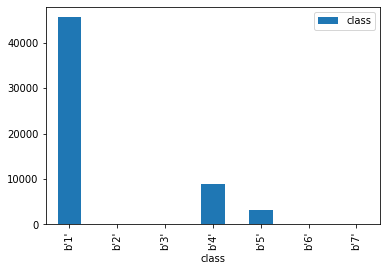

In [4]:
"""Distribution of classes:"""
data.groupby('class').agg({'class':'count'}).plot.bar()
data.groupby('class').agg({'class':'count'})

2. For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different subsets of the training set by randomly subsampling 10%, 20%, . . . , 100% of the training set. Use each of these subsets to train two different classifiers: Decision Tree and Gradient boosting in sklearn. You will work with default hyperparameters for these classifiers in sklearn. When training a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of trained models on the test set. Report model accuracy and training time for each of the 10 subsets of the training set for the two models in a table.

In [68]:
"""Splitting the dataset into 80% training, 20% testing"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import random as rd
import pandas as pd

rd.seed(1999)

X = data.iloc[:, [0,1, 2, 3,4,5,6,7,8]].values


y= data.iloc[:, [-1]].values

le = LabelEncoder()
# applying the lable encoder into the column of index 0
y[:,0] = le.fit_transform(y[:,0])
y = [i[0] for i in y  ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# creating my subsampler fucntions
def subsampler(X, y, percent):
    initial_size = len(X)
    sampled_X = []
    sampled_y = []
    used = []
    while len(sampled_X)/initial_size < percent:
        index = rd.randrange(0,initial_size)
        if index in used:
            print(index,'used')
            continue
        else: 
            sampled_X.append(X[index])
            sampled_y.append(y[index])
            
    return sampled_X,sampled_y

# testing my sub sampler function.
new_x, new_y = subsampler(X_train, y_train, .20)
print(len(new_x),len(new_y))


9280 9280


In [69]:
model_table = pd.DataFrame()

In [71]:

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

from datetime import datetime as dt
from sklearn.metrics import accuracy_score

sizes = [.10, .20, .30, .40, .50, .60 ,.70 , .80, .90, 1]

for size in sizes:
    """I will subsample for both method at the same time and then compute the values in
    this same for loop."""
    # generating the new subsamples, with my function subsampler
    
    subsample_x,subsample_y = subsampler(X_train, y_train, size)
    
    """Generating 10 random subsamples of the training set;
    Training with Decision Tree each dataset;
    Measure time to train of each subsample of training data;
    Evaluate Accuracy of The trained model 
    Report on a table the accuracy, time to train and size fo the subsample 
    for each of the algorithms
"""

    
    # counting how long it takes to train the model 
    start = dt.now()
    classifier_tree = tree.DecisionTreeClassifier().fit(subsample_x, subsample_y)
    running_secs = (dt.now() - start).microseconds
    # getting predictions
    predictions = classifier_tree.predict(X_test)
   
    """ Training with Decision Tree each dataset;
    Measure time to train of each subsample of training data;
    Evaluate Accuracy of The trained model 
    Report on a table the accuracy, time to train and size fo the subsample 
    for each of the algorithms
    """ 
    start = dt.now()  
    classifier_GB = GradientBoostingClassifier().fit(subsample_x, subsample_y)
    running_secs_GB = (dt.now() - start).microseconds
    
    predictions_GB = classifier_GB.predict(X_test)
    
    
    model_table = model_table.append({'size':size,
                                      'time(seconds)_DT':float(running_secs/10000),
                                      'accuracy_DT':accuracy_score(y_test, predictions),
                                      'time(seconds)_GB':float(running_secs_GB/10000),
                                      'accuracy_GB':accuracy_score(y_test, predictions_GB)}, ignore_index=True)
     

    
model_table

,accuracy_DT,accuracy_GB,size,time(seconds)_DT,time(seconds)_GB
0,0.997845,0.997586,0.1,1.4747,14.8220
1,0.999310,0.999483,0.2,1.5375,70.4499
2,0.999224,0.999052,0.3,2.1513,10.2884
3,0.999397,0.999224,0.4,2.9192,19.8405
4,0.999052,0.998621,0.5,3.8273,29.6908
5,0.999741,0.998879,0.6,4.6925,50.5333
6,0.999828,0.999310,0.7,6.3425,60.7767
7,0.996810,0.996897,0.1,1.3299,61.6057
8,0.998621,0.998103,0.2,2.0242,83.3958
9,0.999052,0.998707,0.3,1.7583,14.5258


3. Using the data collected in part 2 you will create learning curve for the two classifiers. A learning curve shows how the accuracy changes with increasing size of training data. You will create one chart with horizontal axis being the percentage of training set and vertical axis being the accuracy on test set. On this chart you will plot learning curve for Decision Tree and Gradient Boosting.

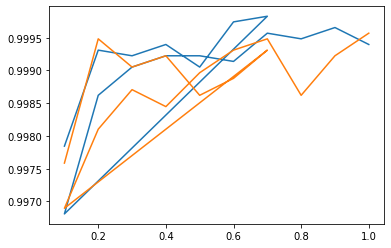

In [72]:
plt.plot(model_table["size"],model_table["accuracy_DT"] )
plt.plot(model_table["size"],model_table["accuracy_GB"] )

plt.show()


4. Next using the data collected in part 3 you will create a chart showing the training time of classifiers with increasing size of training data. So, for each classifier you will have one plot showing the training time as a function of training data size.

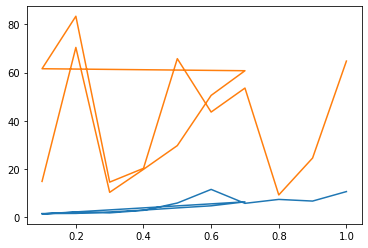

In [73]:
plt.plot(model_table["size"],model_table["time(seconds)_DT"] )
plt.plot(model_table["size"],model_table["time(seconds)_GB"] )

plt.show()